In [1]:
import random
import numpy as np
from numpy.linalg import norm as vector_norm
import matplotlib.pyplot as plt
from itertools import product

import sys
sys.path.append('../modules')
from nsw.nsw_classifier import NSWClassifier
from nsw import rbf

In [2]:
from itertools import product

def plot_potential(mn, mx, f, eps, width=51):
    xi = yi = np.linspace(mn, mx, width)
    pairs = np.array(list(product(xi, yi)))
    test = f(pairs[0], eps)
    print(type(test))
    if type(test) == float or type(test) == np.float64:
        print('flat')
        zi = np.array([f(pair, eps) for pair in pairs]).reshape((width, -1))
        mnv, mxv = zi.min(), zi.max()
        mnv, mxv = -max(abs(mnv), abs(mxv)), max(abs(mnv), abs(mxv))
        fig, ax = plt.subplots(figsize=(15, 15))
        c = ax.pcolormesh(xi, yi, zi, cmap='RdBu', vmin=mnv, vmax=mxv)
        ax.set_title('class edge')
        # set the limits of the plot to the limits of the data
        ax.axis([xi.min(), xi.max(), yi.min(), yi.max()])
        fig.colorbar(c, ax=ax)
        plt.show()
    else:
        print('field')
        zi = np.array([f(pair, eps) for pair in pairs]).reshape((-1, 2))
        fig, ax = plt.subplots(figsize=(15, 15))
        c = ax.quiver(pairs[:, 0], pairs[:, 1], zi[:,0], zi[:, 1])
        ax.set_title('class edge')
        # set the limits of the plot to the limits of the data
        ax.axis([xi.min(), xi.max(), yi.min(), yi.max()])
        plt.show()

Classifier graph is build in 10.752s


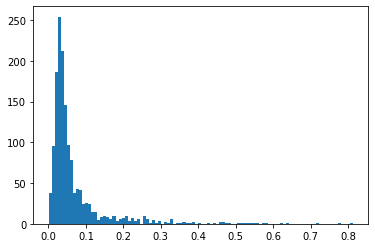

In [3]:
G = NSWClassifier()

N = 2000
values = []
for i in range(N):
    p = np.array([random.random(), random.random()])
    cls = 1 if vector_norm(p - np.array([.5, .5])) < 0.4 else 0
    if random.random() > .97: cls = 1 - cls
    values.append((p, cls))

G.build_navigable_graph(values, attempts=10)

rich_cut = [(e, G.dist(G.nodes[e[0]].value, G.nodes[e[1]].value)) for e in G.cut]
lengths = [e[1] for e in rich_cut]
plt.hist(lengths, bins=100)
plt.show()

In [4]:
smaller_cut = [e for e in rich_cut if e[1] < .03]
len(smaller_cut)

483

<class 'numpy.ndarray'>
field


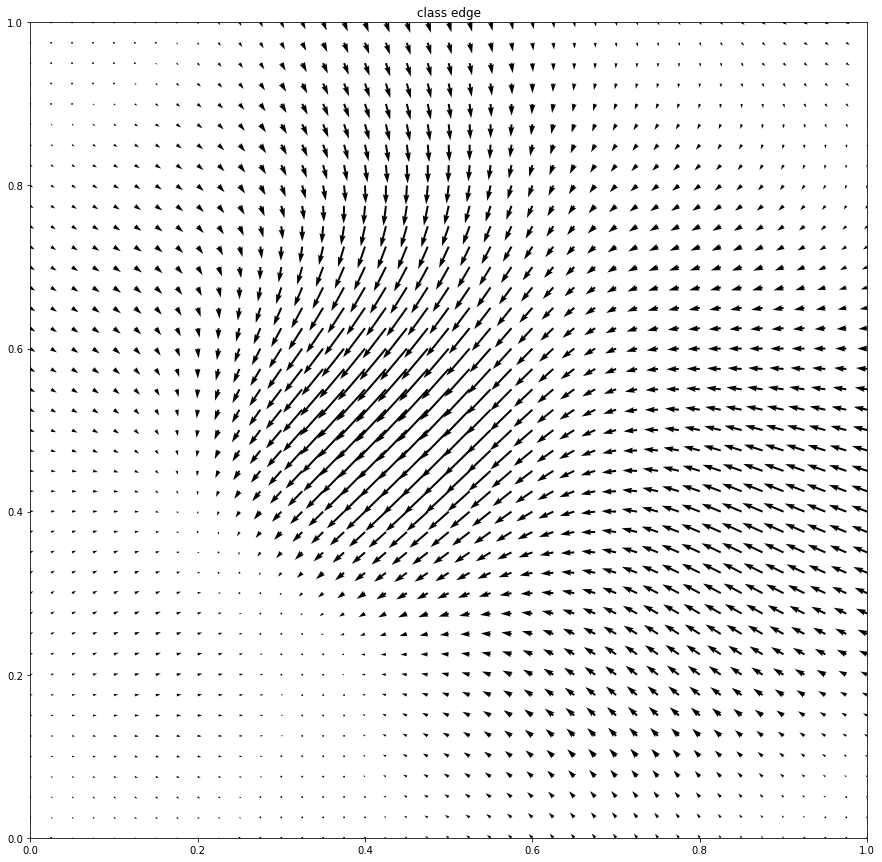

<class 'numpy.ndarray'>
field


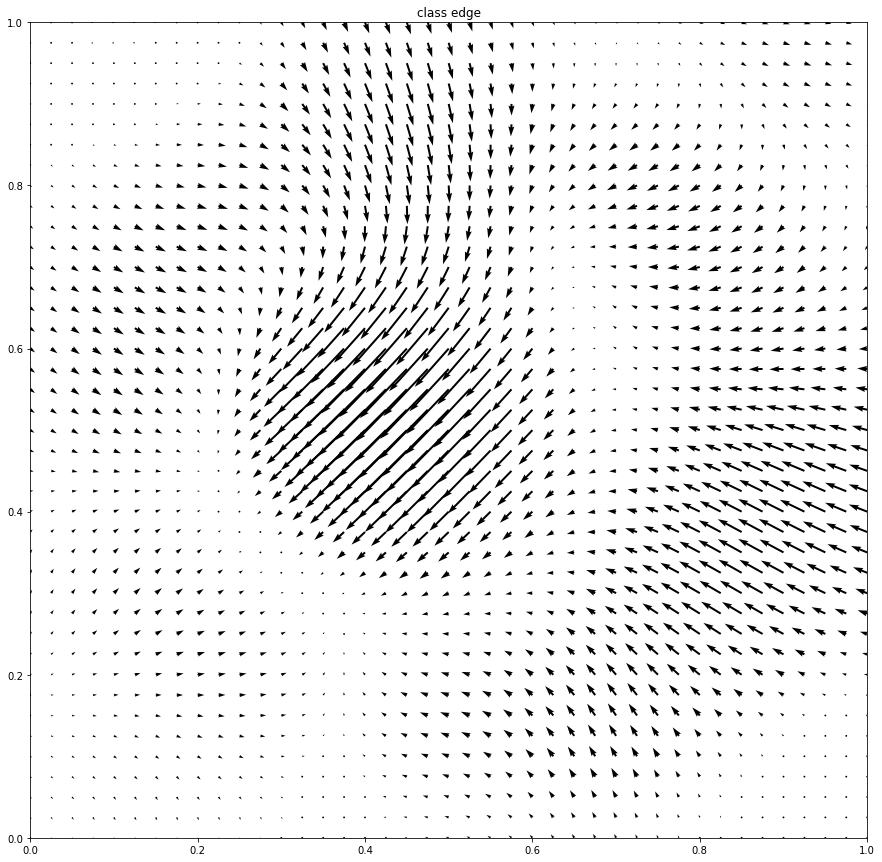

<class 'numpy.ndarray'>
field


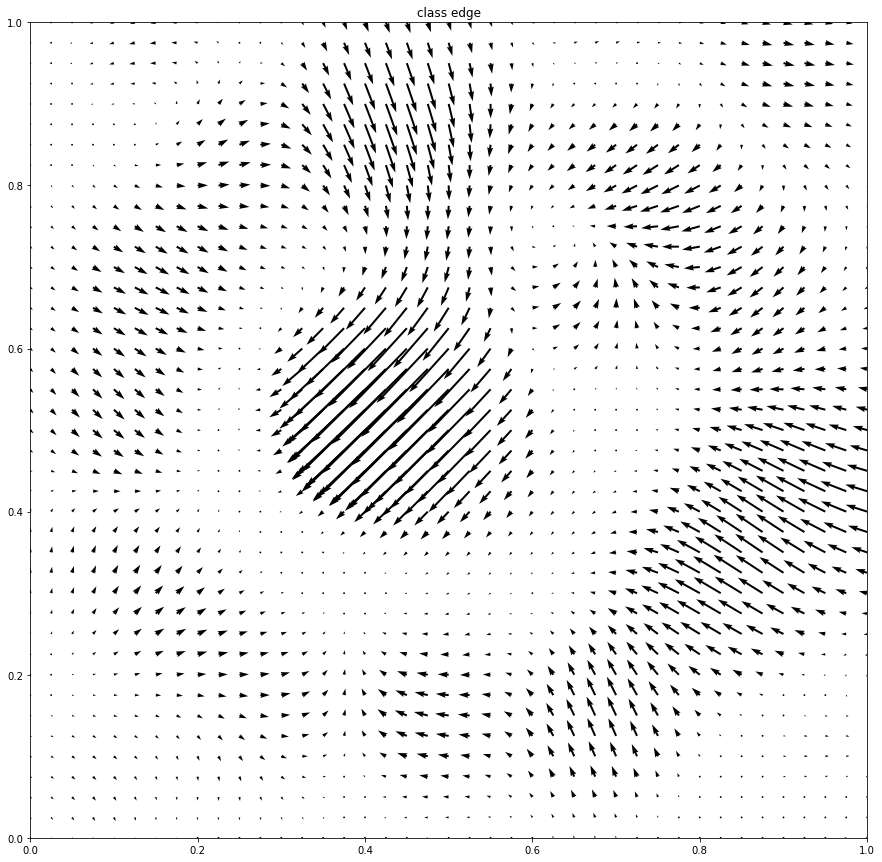

In [5]:
f = rbf.get_vector_rbf_potential_function(G, smaller_cut)
plot_potential(0., 1., f, 5, 41)
plot_potential(0., 1., f, 7, 41)
plot_potential(0., 1., f, 10, 41)

In [ ]:
f = rbf.get_grad_based_classifier_function(G, smaller_cut)
plot_potential(0., 1., f, 7, 81)

.<class 'numpy.float64'>
flat
...................................................